## Importing Libraries

In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns  

## Loading the CSV file 

In [2]:
df=pd.read_csv(r"C:\Users\ADMIN\Downloads\PYTHON FILES\Deep_Learning\Assignments & Projects\Assignment 4\Multiple CSV/4.linearsep.csv",header=None) 
df.head() 

,0,1,2
0,-0.177497,0.930496,1.0
1,1.977424,1.766155,0.0
2,1.800024,1.700343,0.0
3,-0.770837,2.359163,1.0
4,-0.308009,1.594063,1.0


In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [4]:
# Checking whether target variable is imbalanced or not
df[2].value_counts()   

1.0    50
0.0    50
Name: 2, dtype: int64

## checking outliers

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0'>

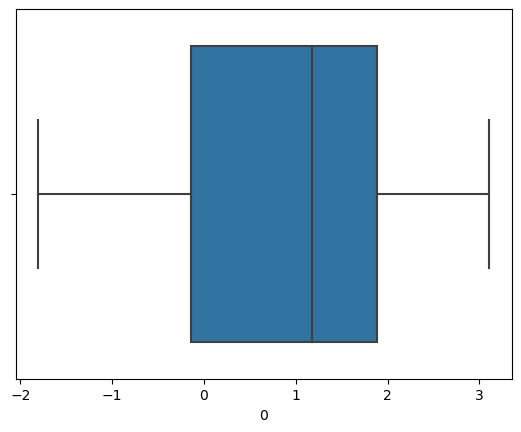

In [5]:
sns.boxplot(df[0]) 

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='1'>

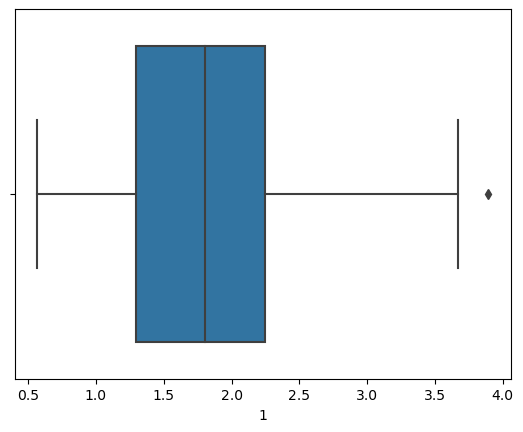

In [6]:
sns.boxplot(df[1]) 

In [7]:
# removing the outliers
df=df[df[1]<3.6] 

In [8]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       98 non-null     float64
 1   1       98 non-null     float64
 2   2       98 non-null     float64
dtypes: float64(3)
memory usage: 3.1 KB


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='1'>

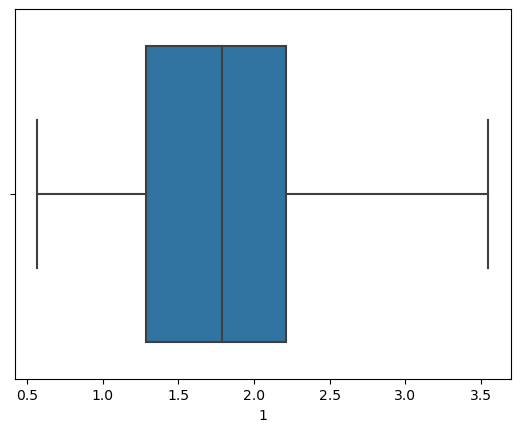

In [9]:
sns.boxplot(df[1])  

## Identifying Input and Output Features

In [10]:
x=df.iloc[:,0:2]
y=df.iloc[:,2].astype(int)  

## Spliting the data into train and test

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1) 

## Standardising input features 

In [12]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test) 

## Build the Logical Structure 

In [13]:
from keras import Sequential 
from keras.layers import Dense 
from keras.regularizers import L1,L2,L1L2 
from keras.optimizers import SGD  

In [14]:
model=Sequential()
model.add(Dense(6,activation="tanh",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001),input_dim=2))
model.add(Dense(3,activation="tanh",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))
model.add(Dense(1,activation="sigmoid",kernel_regularizer=L2(0.001),bias_regularizer=L2(0.001)))

**Observation:**
- As the data is not much complex, tanh activation function is used.
- As model is overfitting, Regularization is used as Lasso with 0.001 learning rate.
- As target variable contains binary class, In output layer i have used sigmoid as activation function.

In [15]:
model.summary()  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 18        
                                                                 
 dense_1 (Dense)             (None, 3)                 21        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 43 (172.00 Byte)
Trainable params: 43 (172.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## compiling the model 

In [16]:
model.compile(loss="binary_crossentropy",optimizer=SGD(0.01),metrics=["accuracy"])
history=model.fit(x_train,y_train,batch_size=10,epochs=20,validation_split=0.1)  

Epoch 1/20
8/8 [==============================] - 1s 55ms/step - loss: 0.5548 - accuracy: 0.7342 - val_loss: 0.5882 - val_accuracy: 0.6667
Epoch 2/20
8/8 [==============================] - 0s 10ms/step - loss: 0.5373 - accuracy: 0.7468 - val_loss: 0.5736 - val_accuracy: 0.6667
Epoch 3/20
8/8 [==============================] - 0s 10ms/step - loss: 0.5211 - accuracy: 0.7595 - val_loss: 0.5602 - val_accuracy: 0.6667
Epoch 4/20
8/8 [==============================] - 0s 10ms/step - loss: 0.5061 - accuracy: 0.7595 - val_loss: 0.5478 - val_accuracy: 0.7778
Epoch 5/20
8/8 [==============================] - 0s 16ms/step - loss: 0.4923 - accuracy: 0.7975 - val_loss: 0.5364 - val_accuracy: 0.7778
Epoch 6/20
8/8 [==============================] - 0s 9ms/step - loss: 0.4790 - accuracy: 0.8354 - val_loss: 0.5255 - val_accuracy: 0.7778
Epoch 7/20
8/8 [==============================] - 0s 11ms/step - loss: 0.4665 - accuracy: 0.8608 - val_loss: 0.5156 - val_accuracy: 0.7778
Epoch 8/20
8/8 [============

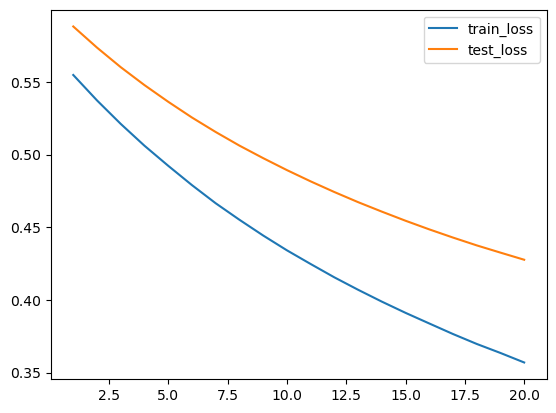

In [17]:
plt.plot(range(1,21),history.history["loss"],label="train_loss")
plt.plot(range(1,21),history.history["val_loss"],label="test_loss") 
plt.legend()  

## Predicting the model

In [18]:
predicted=model.predict(x_test) 
predicted    

1/1 [==============================] - 0s 130ms/step


array([[0.24284738],
       [0.27498725],
       [0.7344731 ],
       [0.5724553 ],
       [0.29393983],
       [0.21487053],
       [0.8209084 ],
       [0.1719738 ],
       [0.7907915 ],
       [0.7701292 ]], dtype=float32)

In [19]:
predicted=np.where(predicted>0.5,1,0)
predicted 

array([[0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1]])

## Evaluating the model

1.0


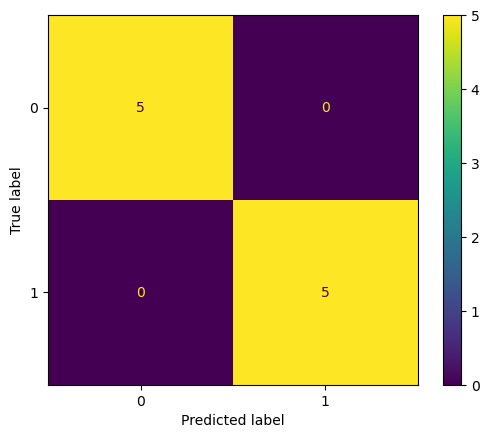

In [20]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,predicted))
cm=confusion_matrix(y_test,predicted)
va=ConfusionMatrixDisplay(cm)
va.plot() 
plt.show()  

## PLOTING THE DECISION SURFACE 

In [21]:
from mlxtend.plotting  import plot_decision_regions  

9600/9600 [==============================] - 22s 2ms/step


<AxesSubplot:>

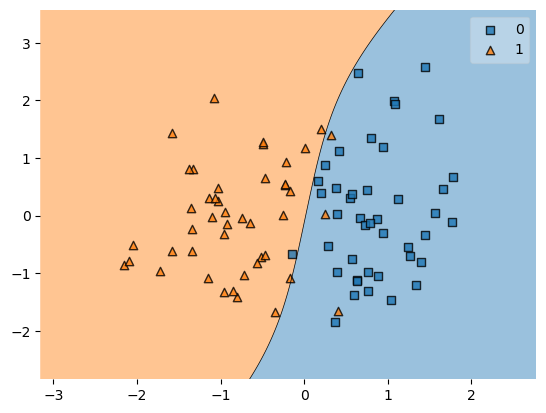

In [22]:
# Decision surface for train data
plot_decision_regions(x_train,y_train.values,clf=model)   

9600/9600 [==============================] - 26s 3ms/step


<AxesSubplot:>

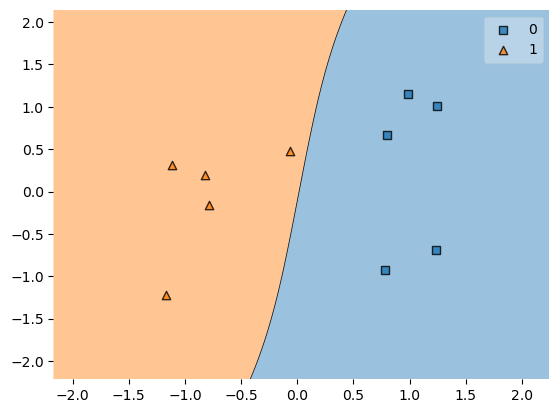

In [23]:
# Decision surface for test data
plot_decision_regions(x_test,y_test.values,clf=model) 

## Conclusions:

- This neural network model achieves an accuracy of around 100%.
            
#### The model architecture consists of 2 hidden layers: 
- In the first hidden layer, there are 6 neurons with the tanh activation function 
- In the second hidden layer, there are 3 neurons with the tanh activation function 

- The output layer uses the sigmoid activation function.

 
#### Overall, this neural network model architecture and training configuration achieve an accuracy of around 100%.    